<a href="https://colab.research.google.com/github/gehad-Ahmed30/Time-series-Forecasting/blob/main/Time_series_Forecasting(Avocado).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML CASE-STUDIES | TIME-SERIES FORECASTING (TSF)

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Predicting Avocado Prices | Facebook Prophet (TSF Case-study)

Dataset Source: https://www.kaggle.com/datasets/neuromusic/avocado-prices

Facebook Prophet: https://facebook.github.io/prophet/

In [3]:
!pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl.metadata (2.9 kB)
  Using cached pystan-3.10.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl.metadata (6.3 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached PyMeeus-0.5.12-py3-none-any.whl
  Using cached ephem-4.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.1 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl.metadata (1.6 kB)
  Using cached httpstan-4.13.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
  Using cached pysimdjson-6.0.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.9 kB)
  Using cached crashtest-0.3.1-py3-none-any.whl.metadata (748 bytes)
  Using cached pastel-0.2.1-py2.py3-none-any.whl.metadata (1.9 kB)

## Importing & Inspecting Data

In [4]:
data = pd.read_csv('/content/avocado.csv')
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [6]:
data = data.sort_values('Date')

In [7]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


## Exploring Data

Text(0.5, 0, 'Date')

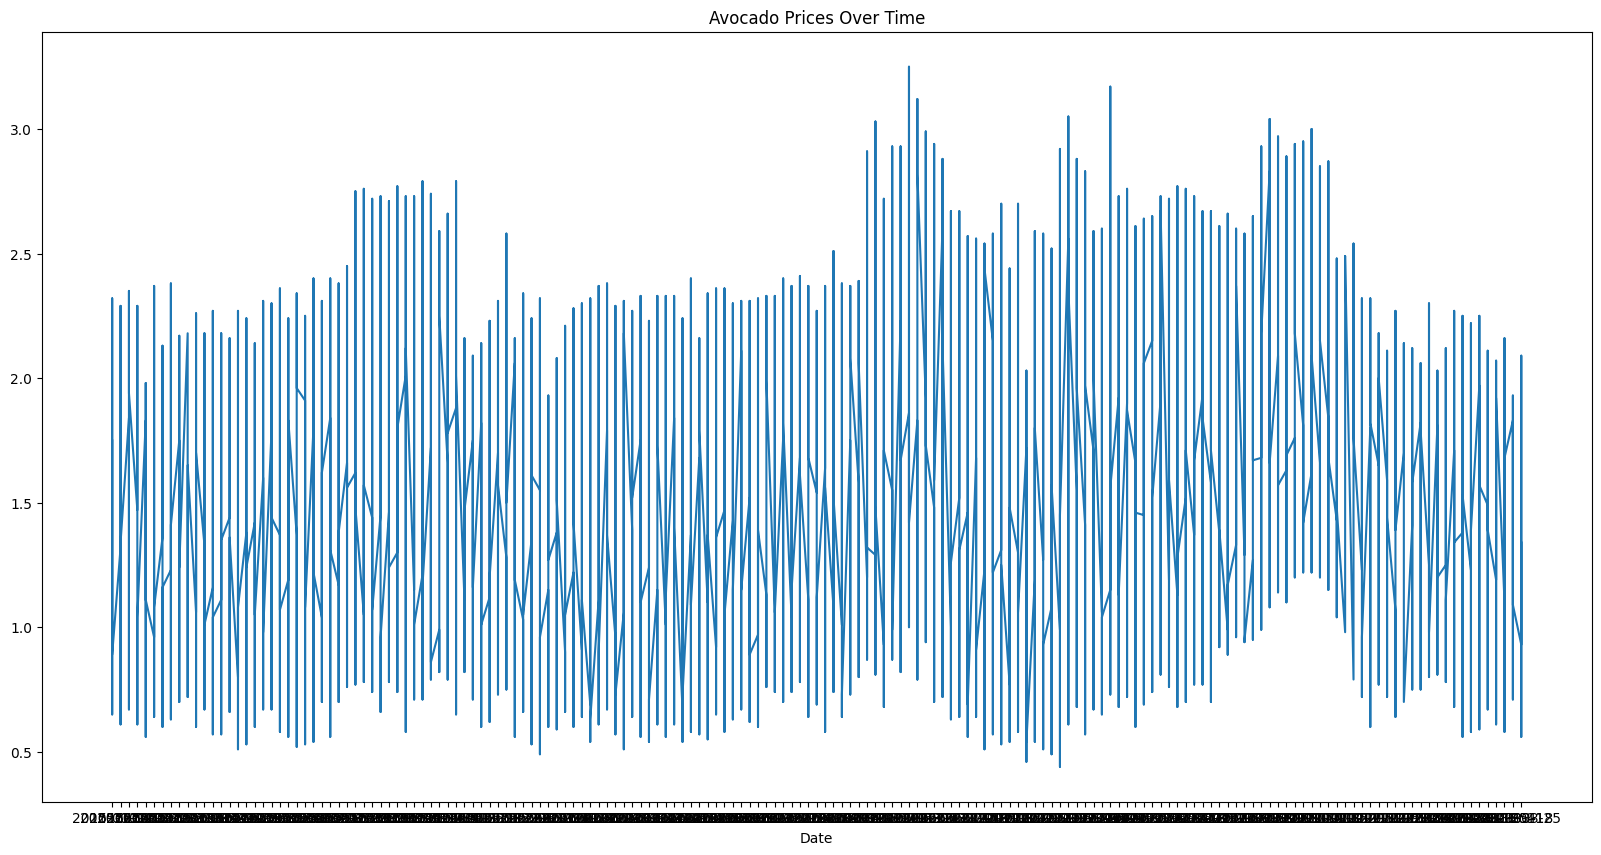

In [9]:
plt.figure(figsize=(20,10))
plt.plot(data['Date'], data['AveragePrice'])
plt.title('Avocado Prices Over Time')
plt.xlabel('Date')

## Pre-processing Data

In [10]:
avocado_ts = data[['Date', 'AveragePrice']]
avocado_ts.head()

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64


In [11]:
avocado_ts.columns = ['ds','y']
avocado_ts.head()

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64


## Model Training & Building

In [19]:
from prophet import Prophet


In [20]:
m = Prophet()
m.fit(avocado_ts)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5me64n48/wighgxvz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5me64n48/udwx9fqe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41024', 'data', 'file=/tmp/tmp5me64n48/wighgxvz.json', 'init=/tmp/tmp5me64n48/udwx9fqe.json', 'output', 'file=/tmp/tmp5me64n48/prophet_modelfrl3e1vv/prophet_model-20250705162311.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:23:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:23:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [22]:
future=m.make_future_dataframe(periods=365)
future.head()

,ds
0,2015-01-04
1,2015-01-11
2,2015-01-18
3,2015-01-25
4,2015-02-01


In [24]:
forcast=m.predict(future)
forcast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.501458,0.891185,1.852112,1.501458,1.501458,-0.117841,-0.117841,-0.117841,-0.117841,-0.117841,-0.117841,0.0,0.0,0.0,1.383616
1,2015-01-11,1.496064,0.872033,1.876593,1.496064,1.496064,-0.109453,-0.109453,-0.109453,-0.109453,-0.109453,-0.109453,0.0,0.0,0.0,1.386612
2,2015-01-18,1.490671,0.898439,1.880644,1.490671,1.490671,-0.109033,-0.109033,-0.109033,-0.109033,-0.109033,-0.109033,0.0,0.0,0.0,1.381639
3,2015-01-25,1.485278,0.865823,1.849192,1.485278,1.485278,-0.127702,-0.127702,-0.127702,-0.127702,-0.127702,-0.127702,0.0,0.0,0.0,1.357576
4,2015-02-01,1.479885,0.815919,1.829927,1.479885,1.479885,-0.155584,-0.155584,-0.155584,-0.155584,-0.155584,-0.155584,0.0,0.0,0.0,1.324300


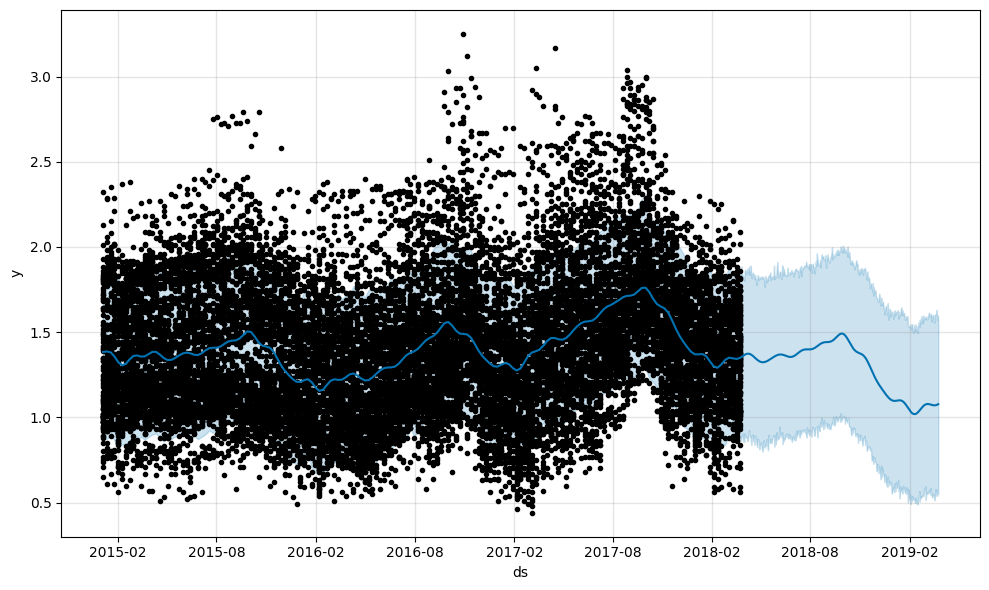

In [27]:
figure1=m.plot(forcast)

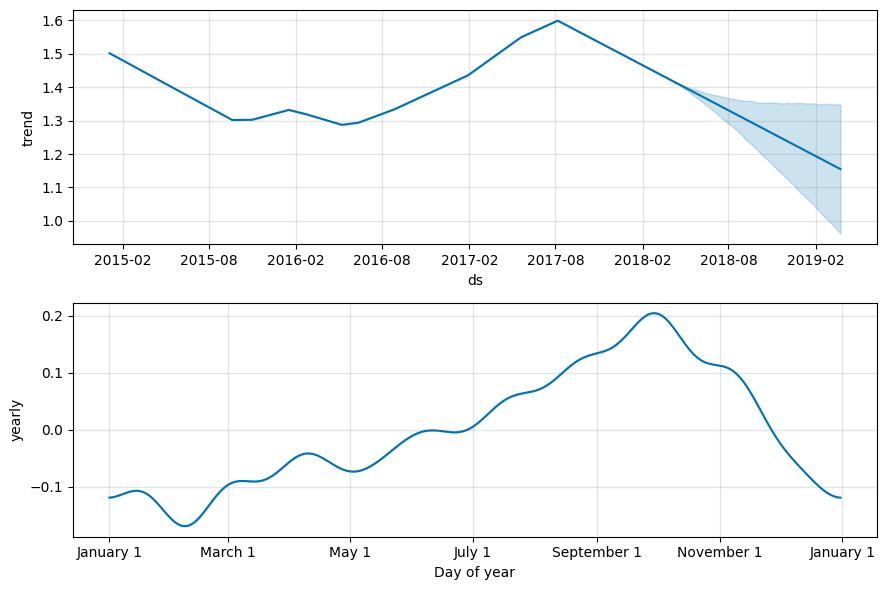

In [28]:
figure2 = m.plot_components(forcast)